In [1]:
import os
import gzip
import torch
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

c:\Users\hari5\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_mnist(path, kind = 'train'):
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
data_path = 'D:/MS/3rd Semester/ROB-GY 6203/HW/HW - 2/Data/task_4'

train_images, train_labels = load_mnist(data_path)
test_images, test_labels = load_mnist(data_path, kind = 't10k')

In [4]:
transform = transforms.ToTensor()

train_sample = transform(train_images)
trainloader = torch.utils.data.DataLoader(train_sample, batch_size = 32, shuffle = True)

test_sample = transform(test_images)
testloader = torch.utils.data.DataLoader(test_sample, batch_size = 32, shuffle = True)

c:\Users\hari5\anaconda3\envs\pytorch\lib\site-packages\torchvision\transforms\functional.py:150: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_numpy.cpp:178.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


In [5]:
dataitr = iter(trainloader)
img = dataitr.next()
print(torch.min(img), torch.max(img))

tensor(0.) tensor(1.)


In [6]:
# Device configuration
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# Defining learning rate and number of epochs
num_epochs = 100
learning_rate = 0.0015
weight_decay = 1e-8

In [8]:
# Encoder
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(28 * 28, 512),
                                     nn.ReLU(),
                                     nn.Linear(512, 256),
                                     nn.ReLU(),
                                     nn.Linear(256, 64))

        self.decoder = nn.Sequential(nn.Linear(64, 256),
                                     nn.ReLU(),
                                     nn.Linear(256, 512),
                                     nn.ReLU(),
                                     nn.Linear(512, 28 * 28),
                                     nn.Sigmoid())
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [9]:
#model = AutoEncoder().to(device)
model = AutoEncoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay = weight_decay)
#scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr = 0.001, steps_per_epoch = int(len(trainloader)), epochs = num_epochs, anneal_strategy = 'linear')

In [10]:
print(model)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=64, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


In [11]:
torch.cuda.empty_cache()

In [12]:
outputs = []
e_f = []
for epoch in range(num_epochs):
    for image in trainloader:
        image = image.reshape(-1, 28 * 28)
        #image = image.to(device)
    
        encoded_image, decoded_image = model(image)
        loss = criterion(decoded_image, image)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #scheduler.step()
    print(f'Epoch: {epoch + 1}, Loss: {loss.item(): .4f}')
    outputs.append((epoch, image, decoded_image))
    e_f.append(encoded_image)
print('Finished Training')

Epoch: 1, Loss:  0.1704
Epoch: 2, Loss:  0.1675
Epoch: 3, Loss:  0.1599
Epoch: 4, Loss:  0.1416
Epoch: 5, Loss:  0.1187
Epoch: 6, Loss:  0.1166
Epoch: 7, Loss:  0.1105
Epoch: 8, Loss:  0.1014
Epoch: 9, Loss:  0.0977
Epoch: 10, Loss:  0.0980
Epoch: 11, Loss:  0.0982
Epoch: 12, Loss:  0.0973
Epoch: 13, Loss:  0.0956
Epoch: 14, Loss:  0.0933
Epoch: 15, Loss:  0.0910
Epoch: 16, Loss:  0.0889
Epoch: 17, Loss:  0.0868
Epoch: 18, Loss:  0.0846
Epoch: 19, Loss:  0.0824
Epoch: 20, Loss:  0.0799
Epoch: 21, Loss:  0.0772
Epoch: 22, Loss:  0.0745
Epoch: 23, Loss:  0.0714
Epoch: 24, Loss:  0.0687
Epoch: 25, Loss:  0.0661
Epoch: 26, Loss:  0.0639
Epoch: 27, Loss:  0.0623
Epoch: 28, Loss:  0.0637
Epoch: 29, Loss:  0.0677
Epoch: 30, Loss:  0.0607
Epoch: 31, Loss:  0.0641
Epoch: 32, Loss:  0.0600
Epoch: 33, Loss:  0.0582
Epoch: 34, Loss:  0.0592
Epoch: 35, Loss:  0.0563
Epoch: 36, Loss:  0.0549
Epoch: 37, Loss:  0.0552
Epoch: 38, Loss:  0.0528
Epoch: 39, Loss:  0.0522
Epoch: 40, Loss:  0.0521
Epoch: 41

In [13]:
with torch.no_grad():
    for images in testloader:
        #images = images.to(device)
        encoded_output, decoded_output= model(images)
        loss = criterion(decoded_image, image)

enc_out = torch.squeeze(encoded_output)
enc_out = enc_out.cpu().detach().numpy()
dec_out = torch.squeeze(decoded_output)
dec_out = dec_out.cpu().detach().numpy()

In [14]:
tsne = TSNE(n_components = 2, random_state = 0)

vis = tsne.fit_transform(enc_out)


c:\Users\hari5\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\hari5\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


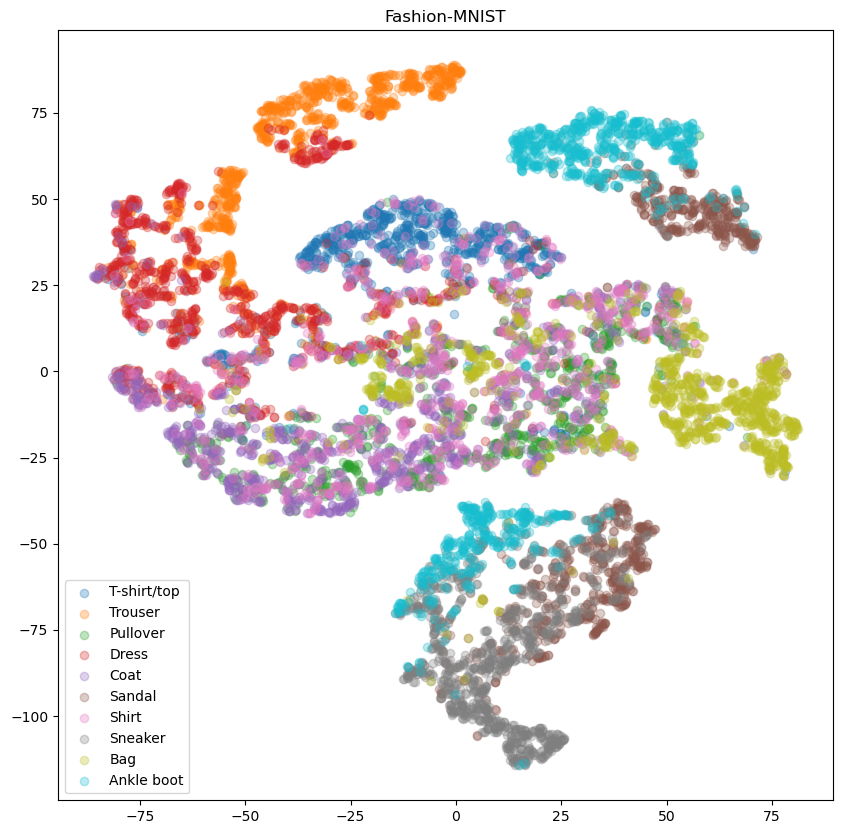

In [15]:
plt.figure(figsize = (10, 10))
plt.title('Fashion-MNIST')
plt.scatter(vis[test_labels == 0, 0], vis[test_labels == 0, 1], label = 'T-shirt/top', alpha = 0.3)
plt.scatter(vis[test_labels == 1, 0], vis[test_labels == 1, 1], label = 'Trouser', alpha = 0.3)
plt.scatter(vis[test_labels == 2, 0], vis[test_labels == 2, 1], label = 'Pullover', alpha = 0.3)
plt.scatter(vis[test_labels == 3, 0], vis[test_labels == 3, 1], label = 'Dress', alpha = 0.3)
plt.scatter(vis[test_labels == 4, 0], vis[test_labels == 4, 1], label = 'Coat', alpha = 0.3)
plt.scatter(vis[test_labels == 5, 0], vis[test_labels == 5, 1], label = 'Sandal', alpha = 0.3)
plt.scatter(vis[test_labels == 6, 0], vis[test_labels == 6, 1], label = 'Shirt', alpha = 0.3)
plt.scatter(vis[test_labels == 7, 0], vis[test_labels == 7, 1], label = 'Sneaker', alpha = 0.3)
plt.scatter(vis[test_labels == 8, 0], vis[test_labels == 8, 1], label = 'Bag', alpha = 0.3)
plt.scatter(vis[test_labels == 9, 0], vis[test_labels == 9, 1], label = 'Ankle boot', alpha = 0.3)
plt.legend()
plt.show()

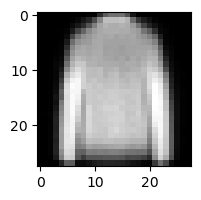

In [16]:
new_img = dec_out[109].reshape(28,28)
plt.figure(figsize = (3, 2))
plt.imshow(new_img,'gray')

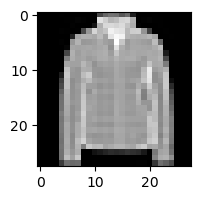

In [17]:
old_img = test_images[109].reshape(28,28)
plt.figure(figsize = (3, 2))
plt.imshow(old_img,'gray')